In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter

from pathlib import Path
import seaborn as sns
import scipy.stats as ss

In [2]:
raw_df = pd.read_csv('bank-full.csv', header= 0, delimiter= ";")
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
raw_df.shape

(45211, 17)

In [4]:
raw_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
raw_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

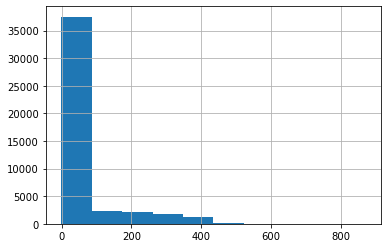

In [7]:
raw_df.pdays.hist()

In [8]:
raw_df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

About 81% of entries in the pdays column are '-1' which corresponds to that person not previously been contacted.

In [9]:
#df = raw_df[raw_df['pdays'] != -1]

Defining the two major kinds of column types for the EDA: numerical (num_col) and categorical (cat_col) data types. The categorical data also includes boolean categories.

In [10]:
num_col = ['age', "balance", 'day', 'duration', 'campaign', 'previous']
cat_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'y_bool']

In [11]:
num_of_days = pd.cut(raw_df.pdays, bins=[-2, 0, 120, 365, 9999],labels=['no cont.', '< 3 months', '< 1 year', '> 1 year'])
num_of_days.value_counts()

no cont.      36954
< 1 year       5715
< 3 months     1899
> 1 year        643
Name: pdays, dtype: int64

In [12]:
raw_df['pdays_cat'] = num_of_days
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no cont.
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no cont.
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no cont.
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no cont.
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no cont.


In [13]:
outcome = raw_df['y']
outcome.replace('no', 0, inplace=True)
outcome.replace('yes', 1, inplace=True)
outcome.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [14]:
raw_df['y_bool'] = outcome
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no cont.,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no cont.,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no cont.,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no cont.,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no cont.,0


In [15]:
raw_df['cust_id'] = raw_df.index
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool,cust_id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no cont.,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no cont.,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no cont.,0,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no cont.,0,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no cont.,0,4


In [16]:
raw_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
pdays_cat    0
y_bool       0
cust_id      0
dtype: int64

In [92]:
data = raw_df.drop(columns=['pdays', 'y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no cont.,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no cont.,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no cont.,0,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no cont.,0,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no cont.,0,4


The Acceptance rate is 11.698%


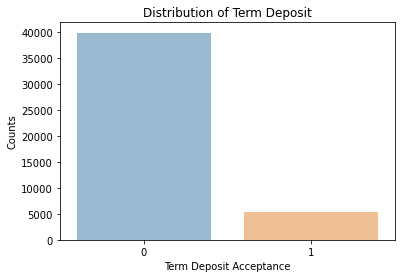

In [57]:
sns.countplot(x='y_bool',data = data, alpha=0.5)
plt.xlabel('Term Deposit Acceptance')
plt.ylabel('Counts')
plt.title('Distribution of Term Deposit');
print('The Acceptance rate is {}%'.format(round(raw_df.y_bool.mean(),5)*100))

In [58]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Portugese Banking Project' / 'reports' / 'figures'
suffix ='.pdf'


# To plot categorical featues.
# We plot categories on x-axis, default rate on primary y-axis & number of observations on secondary y axis.
# Plotting number of observations indicated the credibility of default rate.
def plot_default_cat_feat(df, var, var_desc, sort_by = None):
    """
    Plot default rate for different categories in the feature
    
    Keyword arguments:
    df -- DataFrame
    var -- categorical feature to be grouped by
    var_desc -- description of the feature to be displayed as label 
    sort_by -- specifies how the aggregated dataframe is sorted.  If it is
                'default_rate' -- categories are sorted by default rate in ascending order
                'count' -- categories are sorted by record counts in descending order
                None -- no sorting is done
    
    Missing values are represented by 'Missing' level.
    """

    with plt.style.context('bmh'):
        # aggregate the data
        df_grouped = df.groupby(var,dropna=False).agg({'y_bool':['mean'],'cust_id':['count']}).pipe(flatten_cols)
        df_grouped.index = df_grouped.index.fillna('Missing')

        # sorting
        if sort_by == 'count':
            df_grouped.sort_values(by='cust_id_count',ascending=False,inplace=True)
        elif sort_by == 'default_rate':
            df_grouped.sort_values(by='y_bool_mean',ascending=True,inplace=True)
        
        # plotting default rate on primary y-axis
        fig, ax = plt.subplots()
        # plt.rcParams['figure.dpi']= 480
        fontsize = 15
        # Increase the size of graph when we have more than 4 categories
        if df_grouped.shape[0] > 4:
            fig.set_size_inches(9,6)
            fontsize = 12
            plt.xticks(rotation=45, ha='right')
        ax.plot(df_grouped.index, df_grouped.y_bool_mean, 'o--', color= 'red',alpha=0.6)
        # Add value labels for dafault rates
        #source : https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1%}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, 5), textcoords="offset points",
                        fontsize=fontsize,color = 'red',ha='center', va='bottom') 
            
        ax.set_title('Term Loan Acceptance Rate by '+var_desc)
        ax.set_ylabel('Acceptance Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        
        # setting the y-axis limit
        ax.set_ylim(ymin=0,ymax=df_grouped.y_bool_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        
        # plotting count of records on secondary y-axis
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index,df_grouped.cust_id_count,
                    alpha=0.3, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        
        # Add legends for both y axes
        # source: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
        # https://mpltest2.readthedocs.io/en/stable/gallery/recipes/transparent_legends.html
        fig.legend(labels=('Acceptance Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1),
                   bbox_transform=ax.transAxes,fancybox=True, framealpha=0.2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.savefig(p / (var_desc+'.pdf') )
        plt.show();
      
    
# To plot continuous features. We first convert continuous feature into suitable bins.
# Then we plot bins on x-axis, default rate on primary y-axis & number of observations on secondary y axis.
# Plotting number of observations indicated the credibility of default rate.


def plot_default_cont_feat(df, var, var_desc, n = 10, pct_range = (0.0,1.0), decimals = 0 ):
    """
    Plot default rate for continuous feature. We bin continuous feature & then plot default rate & count of observation.
    
    Keyword arguments:
    df -- DataFrame
    var -- categorical feature to be grouped by
    var_desc -- description of the feature to be displayed as label 
    n -- number of bins
    pct_range -- percentile range used for plotting. Values outside this range will be excluded.
    decimals -- to tune number of bins. eg if a feature has [0,1] range, then decimal is 
                atleast 2 to avoid duplicate bins.
                
    """
    df_temp = df[[var,'y_bool','cust_id']].copy()
    l_pct = pct_range[0]
    u_pct = pct_range[1]
    f_min = df_temp[var].quantile(l_pct) - 1/(10**decimals) # 0.01 added to that lower value is not excluded
    f_max = df_temp[var].quantile(u_pct) + 1/(10**decimals)
    mod_var = 'mod'+'_'+ var
    intvl = pd.interval_range(start=f_min, end= f_max, periods= n)
    # Round lower and upper limits of interval
    intvl = pd.IntervalIndex([ pd.Interval( round(i.left,decimals), 
                                round(i.right,decimals), i.closed ) for i in intvl ])
    df_temp.loc[:,mod_var]= pd.cut(df_temp[var],intvl)
    print('Count of missing observations : {}'.format(df_temp.loc[:,var].isna().sum()))
    excluded_obs = df_temp.loc[:,mod_var].isna().sum() - df_temp.loc[:,var].isna().sum()
    print('Count of excluded observations: {}'.format(excluded_obs))
    df_grouped = df_temp.groupby(mod_var,dropna=False).agg({'y_bool':['mean'],'cust_id':['count']}).pipe(flatten_cols)
    del df_temp  
    with plt.style.context('bmh'):
        # plotting default rate on primary y-axis
        fig, ax = plt.subplots()
        fig.set_size_inches(9,6)
        
        plt.xticks(rotation=45, ha='right')
        ax.plot(df_grouped.index.astype('str'), df_grouped.y_bool_mean, 'o--', color= 'red',alpha=0.6)
        ax.set_title('Term Loan Acceptance Rate by '+var_desc)
        ax.set_ylabel('Acceptance Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        
        # setting the y-axis limit
        ax.set_ylim(ymin=0,ymax=df_grouped.y_bool_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1%}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(5, 5), textcoords="offset points",
                        fontsize=10,color = 'red',ha='center', va='bottom') 
        
        # plotting count of records on secondary y-axis
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index.astype('str'),df_grouped.cust_id_count,
                    alpha=0.3, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        
        # Add legends for both y axes
        # source: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
        # https://mpltest2.readthedocs.io/en/stable/gallery/recipes/transparent_legends.html
        fig.legend(labels=('Acceptance Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1),
                   bbox_transform=ax.transAxes,fancybox=True, framealpha=0.2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.savefig(p / (var_desc+'.pdf') )
        plt.show();
        

def sturge(N):
    
    """Finds the number of bins for a histogram based on Sturge's Rule.
    
    Keyword Arguments:
    N -- the number of samples in the set
    
    """
    K = 1 + 3.322* math.log(N, 10)
    return int(round(K,0))

In [38]:
bins = sturge(len(raw_df))
bins

16

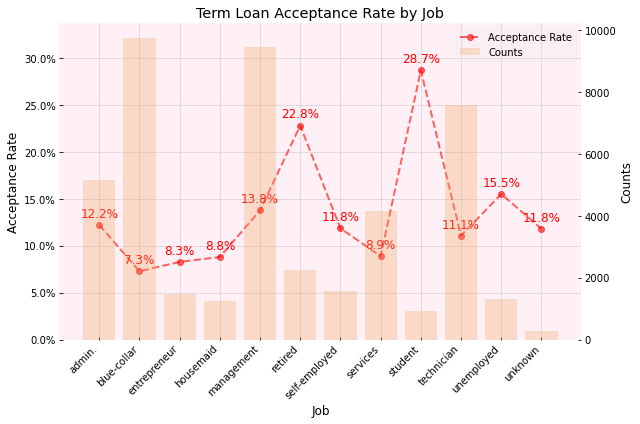

In [59]:
plot_default_cat_feat(data, 'job', 'Job')

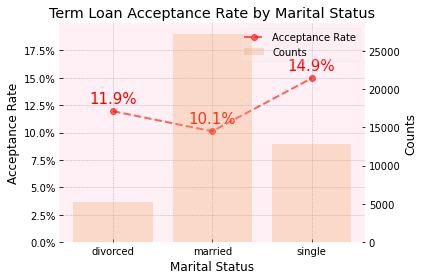

In [60]:
plot_default_cat_feat(data, 'marital', 'Marital Status')

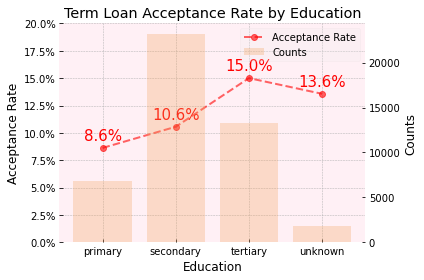

In [61]:
plot_default_cat_feat(data, 'education', 'Education')

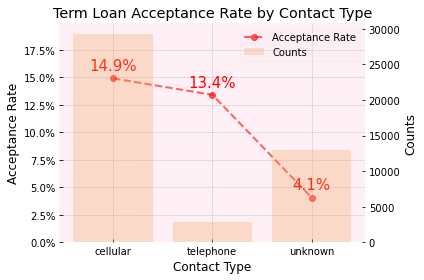

In [62]:
plot_default_cat_feat(data, 'contact', 'Contact Type')

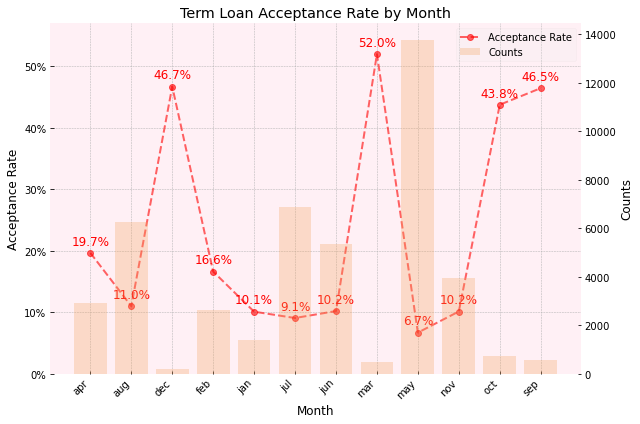

In [63]:
plot_default_cat_feat(data, 'month', 'Month')

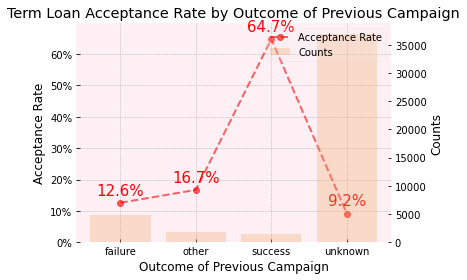

In [64]:
plot_default_cat_feat(data, 'poutcome', 'Outcome of Previous Campaign')

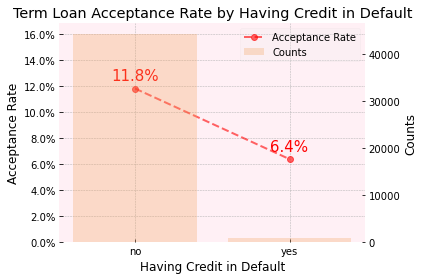

In [65]:
plot_default_cat_feat(data, 'default', 'Having Credit in Default')

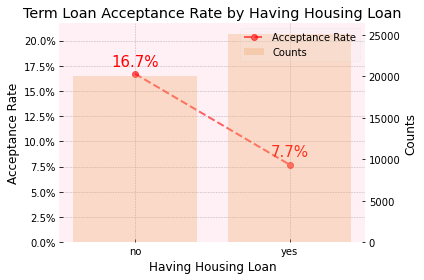

In [66]:
plot_default_cat_feat(data, 'housing', 'Having Housing Loan')

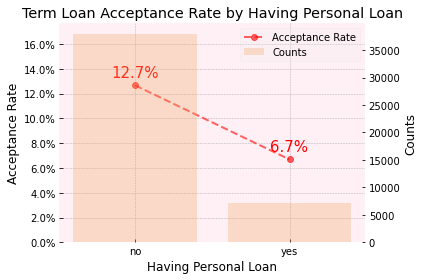

In [67]:
plot_default_cat_feat(data, 'loan', 'Having Personal Loan')

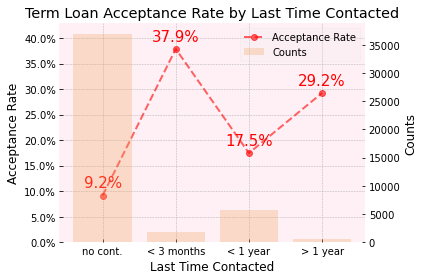

In [68]:
plot_default_cat_feat(data, 'pdays_cat', 'Last Time Contacted')

Count of missing observations : 0
Count of excluded observations: 0


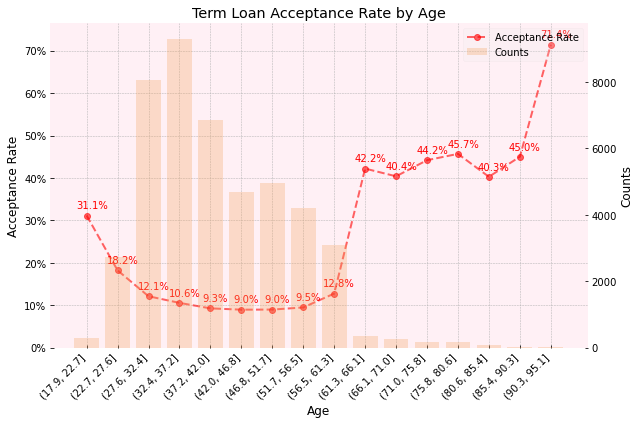

In [69]:
plot_default_cont_feat(data, 'age', "Age", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


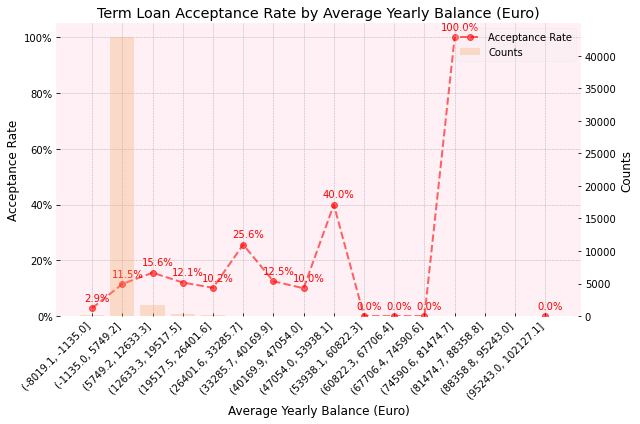

In [70]:
plot_default_cont_feat(data, 'balance', "Average Yearly Balance (Euro)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


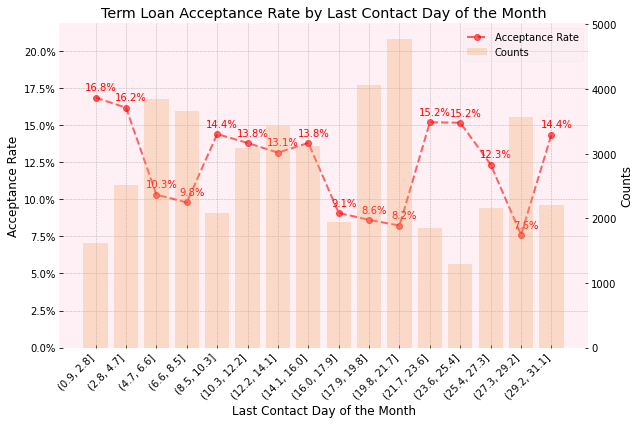

In [71]:
plot_default_cont_feat(data, 'day', "Last Contact Day of the Month", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


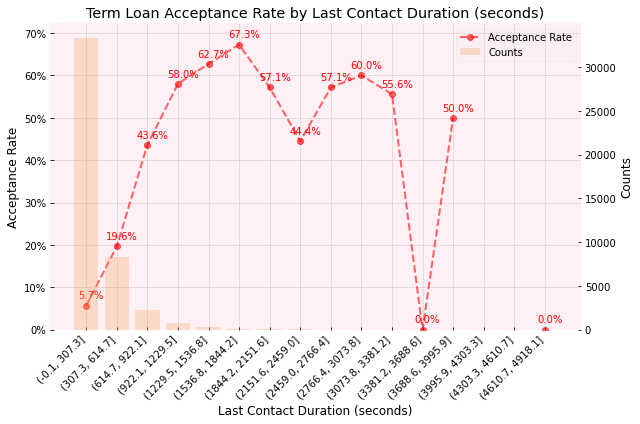

In [72]:
plot_default_cont_feat(data, 'duration', "Last Contact Duration (seconds)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


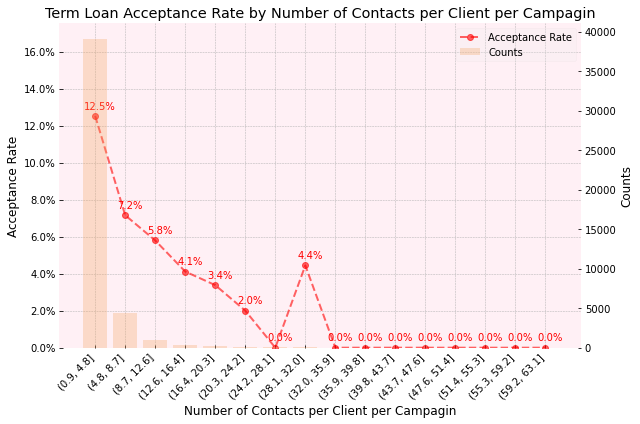

In [73]:
plot_default_cont_feat(data, 'campaign', "Number of Contacts per Client per Campagin", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


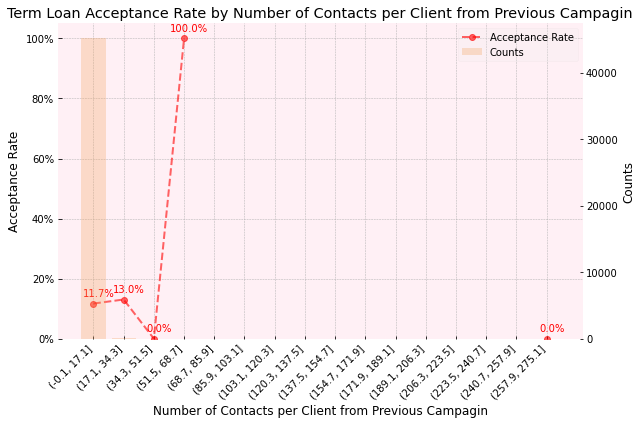

In [74]:
plot_default_cont_feat(data, 'previous', "Number of Contacts per Client from Previous Campagin", n = bins, pct_range = (0.0,1.0), decimals = 1)

In [77]:
# original source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

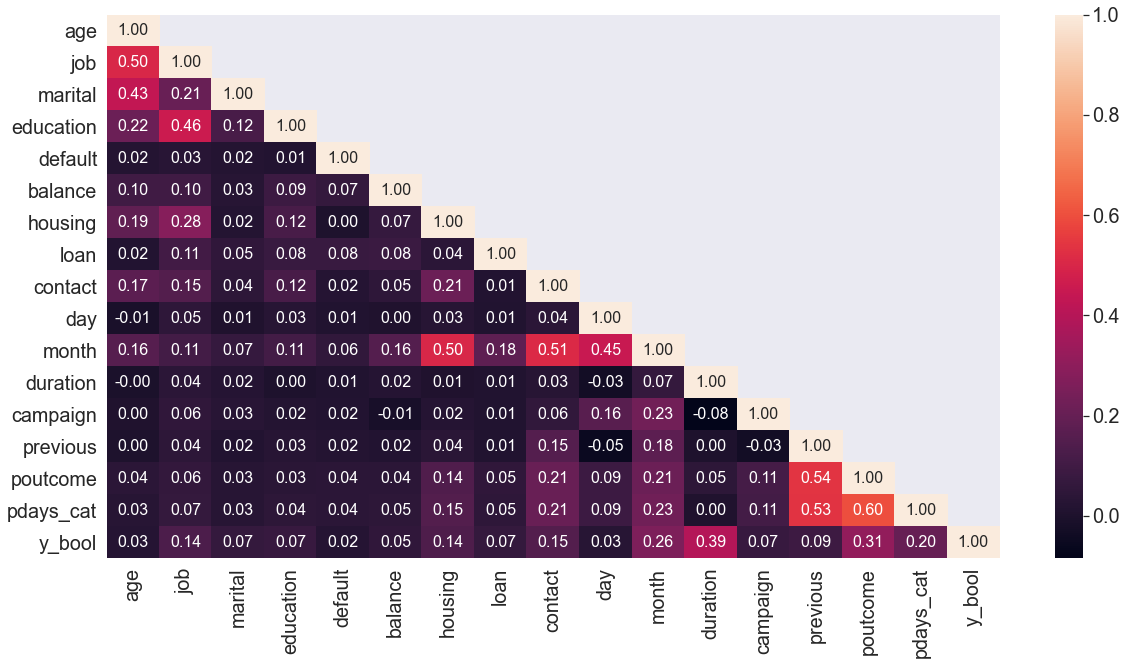

In [96]:
# initial source: https://github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb

columns = data.columns
columns = columns.drop(['cust_id'])
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
        
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in cat_col) and (columns[j] in cat_col):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
            
            elif (columns[i] in num_col) and (columns[j] in num_col):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                #if pvalue > 0.05:
                    #corr_factor = np.nan
            
            elif (columns[i] in num_col) and (columns[j] in cat_col):
                corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                
            elif (columns[i] in cat_col) and (columns[j] in num_col):
                corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
                           
                #if pvalue > 0.05:
                    #corr_factor = np.nan
                
            corr.loc[columns[j],columns[i]] = corr_factor
    
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.8) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16})
plt.show()    


In [ ]:
num_col = ['age', "balance", 'day', 'duration', 'campaign', 'previous']
cat_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'y_bool']